In [58]:
%matplotlib inline
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

gdal.UseExceptions()

#Utility function to load data
def loadData(infile, band=1):
    ds = gdal.Open(infile, gdal.GA_ReadOnly)
    #Data array
    data = ds.GetRasterBand(band).ReadAsArray()
    #Map extent
    trans = ds.GetGeoTransform()
    xsize = ds.RasterXSize
    ysize = ds.RasterYSize
    extent = [trans[0], trans[0] + xsize * trans[1],
            trans[3] + ysize*trans[5], trans[3]]
    
    ds = None
    return data, extent

In [81]:
wd = '/u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01'
s2 = '/u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2'
s1 = '/u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1'

suffix = 'mintpy/geo'
segments = [s1,s2]
dsets = ['geo_velocity.h5','geo_temporalCoherence.h5']

In [78]:
pwd

'/u/sar-r2/fwilliam/Calif/UAVSAR/Stacks'

In [70]:
!mkdir $wd

In [84]:
cd $wd

/u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01


In [85]:
pwd

'/u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01'

In [35]:
for s in segments:
    for d in dsets:
        infile = os.path.join(s,suffix,d)
        outfile = os.path.join(wd,f'{os.path.basename(s)}_{d[4:-3]}.tif')
        !save_gdal.py $infile -o $outfile

read metadata from file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/geo/geo_velocity.h5
read data     from file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/geo/geo_velocity.h5
initiate GDAL driver: GeoTIFF
create raster band
raster row / column number: 8333, 4892
raster transform info: (-122.30984445672122, 0.00010578355962721709, 0, 37.60865271806831, 0, -4.3168070221313536e-05)
write data to raster band
set projectection as: EPSG 4326
finished writing to /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01/Haywrd_05502_01-S1_velocity.tif
read metadata from file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/geo/geo_temporalCoherence.h5
read data     from file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/geo/geo_temporalCoherence.h5
initiate GDAL driver: GeoTIFF
create raster band
raster row / column number: 8333, 4892
raster transform info: (-122.30984445672122, 0.00010578355962721709, 0, 37.6086527

In [92]:
for d in dsets:
    s1file = os.path.join(s1,suffix,d)
    s2file = os.path.join(s2,suffix,d)
    outh5 = os.path.join(wd,d[4:])
    outtif = os.path.join(wd,f'{d[4:-2]}tif')
    !image_stitch.py $s1file $s2file -o $outh5
    !save_gdal.py $outh5 -o $outtif

files to be stitched:
	/u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/geo/geo_velocity.h5
	/u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy/geo/geo_velocity.h5
read data from file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/geo/geo_velocity.h5
--------------------------------------------------
read data from file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy/geo/geo_velocity.h5
stitching ...
file 1: X_STEP - 0.00010578355962721709, Y_STEP - -4.3168070221313536e-05
file 2: X_STEP - 0.00010684896066276069, Y_STEP - -4.307787634693426e-05
rescale the 2nd matrix into the same spatial resolution as the 1st one ...
grab corners of input matrices
calculate corners of output matrix
estimate difference in the overlaping area
average offset between two matrices in the common area: -0.00022676902863552013
offset all pixel values in the 2nd matrix by -0.00022676902863552013 
create output metadata and matrix in shape of (1

In [59]:
!ls $wd

Haywrd_05502_01-S1_temporalCoherence.tif  Haywrd_05502_01-S2_velocity.tif
Haywrd_05502_01-S1_velocity.tif		  temporalCoherence.tif
Haywrd_05502_01-S2_temporalCoherence.tif  velocity.tif


In [95]:
data, extent = loadData('temporalCoherence.tif')

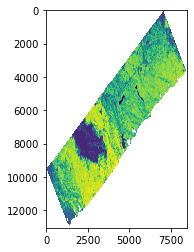

In [96]:
plt.imshow(data)

In [97]:
cp temporalCoherence.tif /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/temporalCoherence.tif

In [98]:
cp velocity.tif /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/velocity.tif